In [91]:
from pydataset import data
import pandas as pd
import numpy as np
import matplotlib

In [2]:
mpg = data('mpg') # load the dataset and store it in a variable
# data('mpg', show_doc=True) # view the documentation for the dataset
mpg

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
1,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
2,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
3,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
4,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
5,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
...,...,...,...,...,...,...,...,...,...,...,...
230,volkswagen,passat,2.0,2008,4,auto(s6),f,19,28,p,midsize
231,volkswagen,passat,2.0,2008,4,manual(m6),f,21,29,p,midsize
232,volkswagen,passat,2.8,1999,6,auto(l5),f,16,26,p,midsize
233,volkswagen,passat,2.8,1999,6,manual(m5),f,18,26,p,midsize


Load the mpg dataset. Read the documentation for it, and use the data to answer these questions:

On average, which manufacturer has the best miles per gallon?
How many different manufacturers are there?
How many different models are there?
Do automatic or manual cars have better miles per gallon?

In [3]:
mpg['average_mileage']= (mpg.hwy+mpg.cty)/2
mpg.groupby('manufacturer').average_mileage.max()
#Volkswagen has the best overall mpgtr

manufacturer
audi          25.5
chevrolet     26.0
dodge         21.0
ford          22.0
honda         30.5
hyundai       26.0
jeep          19.5
land rover    15.0
lincoln       15.0
mercury       16.0
nissan        27.5
pontiac       23.0
subaru        23.5
toyota        32.5
volkswagen    39.5
Name: average_mileage, dtype: float64

In [4]:
total_no_models=mpg.groupby('model').manufacturer.max()
total_no_models= total_no_models.count()
total_no_models

38

In [5]:
mpg.groupby('trans').average_mileage.max()
manual= (39.5+27.5)/2
auto= round((27+27+35+30.5+19.5+23.5+26.5+25.5)/9, 2)
print("The average mpg for manual transmissions is", manual,"The average mpg for automatic transimissions is", auto)

The average mpg for manual transmissions is 33.5 The average mpg for automatic transimissions is 23.83


Joining and Merging
Copy the users and roles dataframes from the examples above. What do you think a right join would look like? An outer join? What happens if you drop the foreign keys from the dataframes and try to merge them?

In [6]:
users = pd.DataFrame({
    'id': [1, 2, 3, 4, 5, 6],
    'name': ['bob', 'joe', 'sally', 'adam', 'jane', 'mike'],
    'role_id': [1, 2, 3, 3, np.nan, np.nan]
})
users

,id,name,role_id
0,1,bob,1.0
1,2,joe,2.0
2,3,sally,3.0
3,4,adam,3.0
4,5,jane,NaN
5,6,mike,NaN


In [7]:
roles = pd.DataFrame({
    'id': [1, 2, 3, 4],
    'name': ['admin', 'author', 'reviewer', 'commenter']
})
roles

,id,name
0,1,admin
1,2,author
2,3,reviewer
3,4,commenter


In [19]:
merging_in=pd.merge(users,roles, on='id', how='inner')
merging_in

,id,name_x,role_id,name_y
0,1,bob,1.0,admin
1,2,joe,2.0,author
2,3,sally,3.0,reviewer
3,4,adam,3.0,commenter


In [20]:
merging_out= merging_left=pd.merge(users,roles, on='id', how='outer')
merging_out

,id,name_x,role_id,name_y
0,1,bob,1.0,admin
1,2,joe,2.0,author
2,3,sally,3.0,reviewer
3,4,adam,3.0,commenter
4,5,jane,NaN,NaN
5,6,mike,NaN,NaN


In [21]:
merging_left=pd.merge(users,roles, on='id', how='left')
merging_left

,id,name_x,role_id,name_y
0,1,bob,1.0,admin
1,2,joe,2.0,author
2,3,sally,3.0,reviewer
3,4,adam,3.0,commenter
4,5,jane,NaN,NaN
5,6,mike,NaN,NaN


In [22]:
merging_right=pd.merge(users,roles, on='id', how='right')
merging_right

,id,name_x,role_id,name_y
0,1,bob,1.0,admin
1,2,joe,2.0,author
2,3,sally,3.0,reviewer
3,4,adam,3.0,commenter


In [23]:
roles.drop(columns=['id'])
merger=pd.merge(users,roles, on='name', how='right')
merger

,id_x,name,role_id,id_y
0,NaN,admin,NaN,1
1,NaN,author,NaN,2
2,NaN,reviewer,NaN,3
3,NaN,commenter,NaN,4


Visualize the number of employees with each title.
Join the employees and titles dataframes together.
Visualize how frequently employees change titles.
For each title, find the hire date of the employee that was hired most recently with that title.
Write the code necessary to create a cross tabulation of the number of titles by department. (Hint: this will involve a combination of SQL and python/pandas code)

A. Create a function named get_db_url. It should accept a username, hostname, password, and database name and return a url formatted like in the examples in this lesson.

In [61]:
from env import host, user, password
def get_db_url(db, user=user, host=host, password=password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'

In [ ]:
B. Use your function to obtain a connection to the employees database.

In [67]:
##Making a CSV file
sql_query = 'SELECT * FROM employees'
employees = pd.read_sql(sql_query, get_db_url('employees'))
employees.to_csv('employees.csv')
##Reading the CSV file
employees = pd.read_csv('employees.csv', index_col=0)
employees.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
4,10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


C. Once you have successfully run a query:
Intentionally make a typo in the database url. What kind of error message do you see?
Intentionally make an error in your SQL query. What does the error message look like?

In [ ]:
get_dbs_url = f'mysql+pymysql://{usesr}:{password}@{host}/employees'

In [ ]:
get_dbs_url = f'mysql+pymysql://{user}:{password}@{host}/employeses'
get_dbs_url

D. Read the employees and titles tables into two separate dataframes

In [68]:
sql_query = 'SELECT * FROM titles'

In [70]:
titles = pd.read_sql(sql_query, get_db_url('employees'))
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [73]:
##Making titles into a CSV file
titles.to_csv('titles.csv')
##Reading the CSV file
titles = pd.read_csv('titles.csv', index_col=0)
titles.head()

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
3,10004,Engineer,1986-12-01,1995-12-01
4,10004,Senior Engineer,1995-12-01,9999-01-01


In [74]:
##about the titles dataframe
titles.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 443308 entries, 0 to 443307
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   emp_no     443308 non-null  int64 
 1   title      443308 non-null  object
 2   from_date  443308 non-null  object
 3   to_date    443308 non-null  object
dtypes: int64(1), object(3)
memory usage: 16.9+ MB


In [75]:
##about the employees dataframe
employees.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300024 entries, 0 to 300023
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   emp_no      300024 non-null  int64 
 1   birth_date  300024 non-null  object
 2   first_name  300024 non-null  object
 3   last_name   300024 non-null  object
 4   gender      300024 non-null  object
 5   hire_date   300024 non-null  object
dtypes: int64(1), object(5)
memory usage: 16.0+ MB


e. Visualize the number of employees with each title.

In [78]:
#determine the current titles of the employee
currently = titles.to_date == titles.to_date.max()
currently.head(5)

0     True
1     True
2     True
3    False
4     True
Name: to_date, dtype: bool

In [79]:
##Out of the current titles, get more information about the employee and what their actual title is
current_emp_titles = titles[currently]
current_emp_titles.head(5)

,emp_no,title,from_date,to_date
0,10001,Senior Engineer,1986-06-26,9999-01-01
1,10002,Staff,1996-08-03,9999-01-01
2,10003,Senior Engineer,1995-12-03,9999-01-01
4,10004,Senior Engineer,1995-12-01,9999-01-01
5,10005,Senior Staff,1996-09-12,9999-01-01


In [81]:
count_titles = current_emp_titles.title.value_counts()
count_titles

Senior Engineer       85939
Senior Staff          82024
Engineer              30983
Staff                 25526
Technique Leader      12055
Assistant Engineer     3588
Manager                   9
Name: title, dtype: int64

AttributeError: module 'matplotlib' has no attribute 'title'

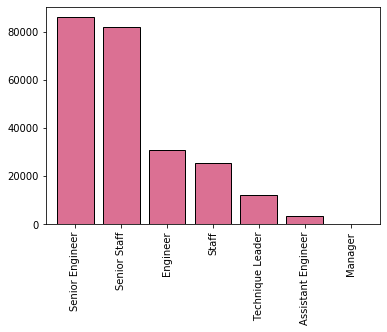

In [93]:
count_titles.plot.bar(color='palevioletred', 
                               ec='black', 
                               width=.8)
plt.title('Count of Current Employees Who Hold Each Title')
plt.xlabel('Number of Employees')

plt.show()

f. Join the employees and titles dataframes together.

In [94]:
all_emp_titles = employees.merge(titles, on='emp_no')
all_emp_titles.head()

,emp_no,birth_date,first_name,last_name,gender,hire_date,title,from_date,to_date
0,10001,1953-09-02,Georgi,Facello,M,1986-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,1964-06-02,Bezalel,Simmel,F,1985-11-21,Staff,1996-08-03,9999-01-01
2,10003,1959-12-03,Parto,Bamford,M,1986-08-28,Senior Engineer,1995-12-03,9999-01-01
3,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Engineer,1986-12-01,1995-12-01
4,10004,1954-05-01,Chirstian,Koblick,M,1986-12-01,Senior Engineer,1995-12-01,9999-01-01
